# Finding Zestimate erros
 by Jared Godar and Daniel Northcutt

# Goals:
  - Work through datascience pipline for zillow data, documenting the process
  - Use clustering and regression modeling to beat the baseline model
  - Find the drivers for logerror in the Zestimate model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Modeling Tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.formula.api import ols

from datetime import date
from scipy import stats


#Custom functions
from env import host, user, password #Database credentials
import wrangle3
import env
import eval_model
import explore
## Evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
##### 

In [3]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test=wrangle3.wrangle()


In [4]:
# train data set
train.shape

(36384, 70)

In [5]:
# train dataset encoded with clustering, dummies, bins, scaled features
X_train.shape

(36384, 70)

In [6]:
train.calculatedfinishedsquarefeet


21580   2000.00000
32781   7393.00000
33161   1778.00000
45785   2777.00000
45820   1939.00000
           ...    
14404   2174.00000
1276    1560.00000
34315   1881.00000
24599    721.00000
14306   2579.00000
Name: calculatedfinishedsquarefeet, Length: 36384, dtype: float64

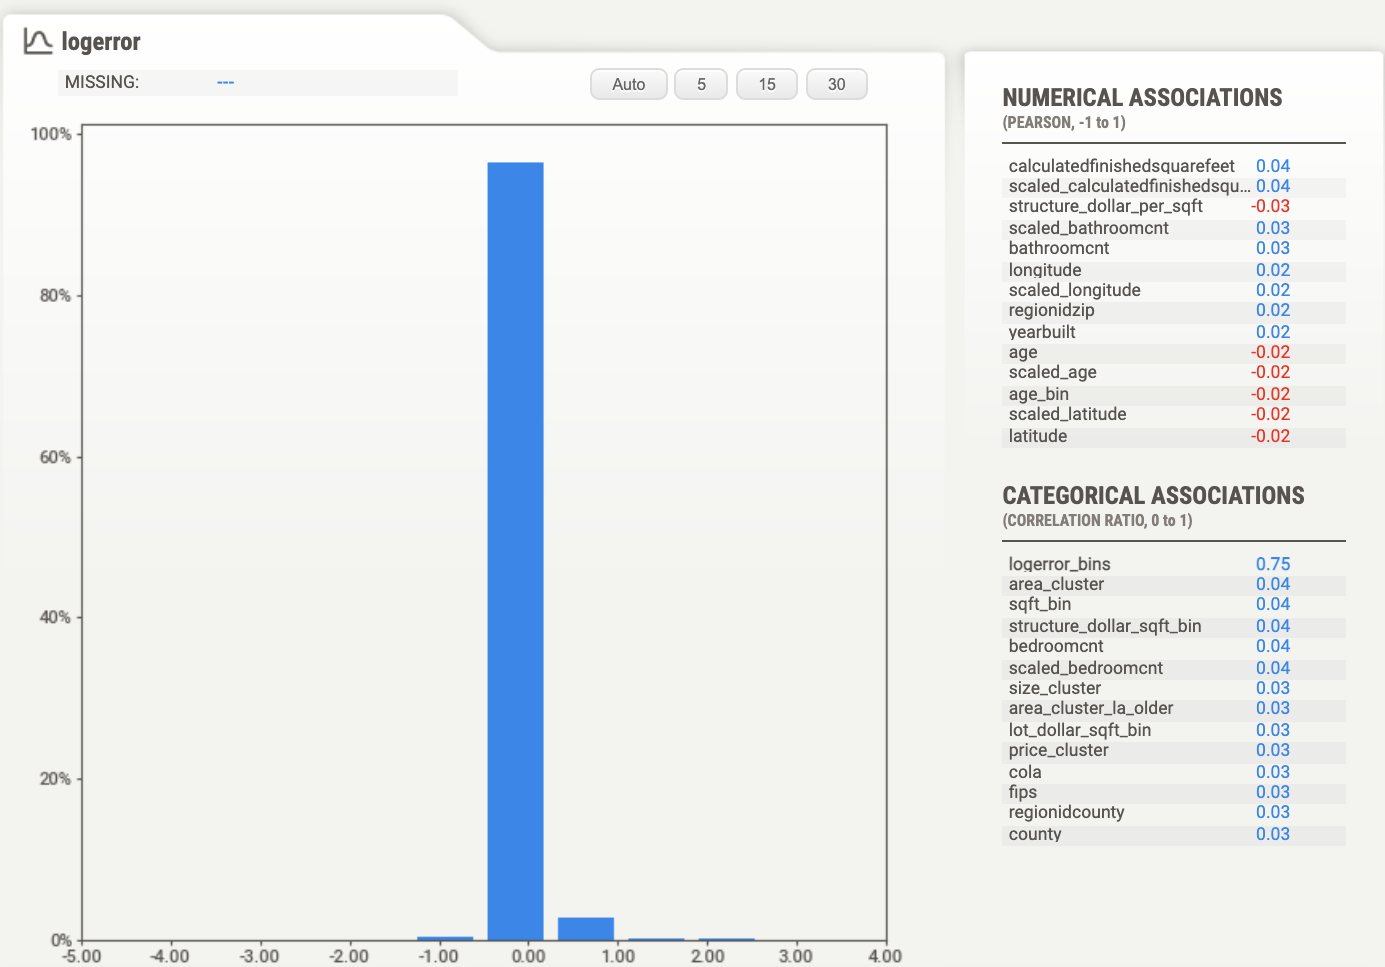

In [7]:
# sweet_viz import to run correlation on training dataset
# image pulled from logerror, highlighting the important features that show correlation with the target variable
# 

from IPython.display import Image
Image("logerror.png")

 The correlation between the calculatedfinishedsquarefeet and the logerror: 0.0355
 The P value between the calculatedfinishedsquarefeet and the logerror:  1.336e-11
 
Reject null hypothesis:
 'There is no correlation between the calculatedfinishedsquarefeet and the logerror'


We now move forward with our alternative hypothesis: 'There is a correlation between the calculatedfinishedsquarefeet and logerror'


This is positive correlation.


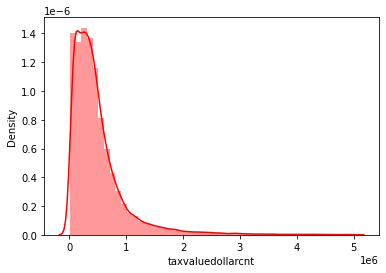

In [8]:
explore.calculatedfinishedsquarefeet_corr()

# Clustering
    - We grouped features into multiple clusters settling on four unique clusters to explore


# Cluster 1: Area

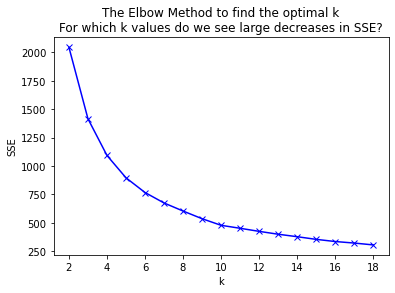

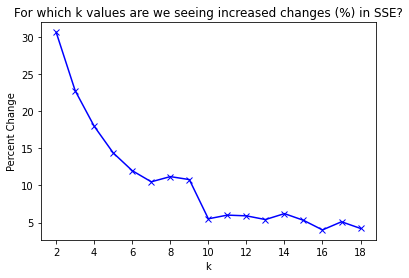

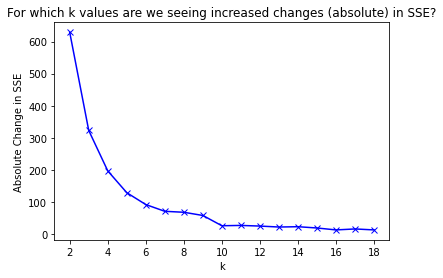

,k,sse,delta,pct_delta
0,2,2044.67916,629.00000,30.70000
1,3,1416.03508,323.00000,22.80000
2,4,1093.33617,197.00000,18.00000
3,5,896.72467,129.00000,14.40000
4,6,767.40849,92.00000,12.00000
5,7,675.39353,71.00000,10.50000
6,8,604.57386,68.00000,11.20000
7,9,536.90456,58.00000,10.80000
8,10,478.98563,26.00000,5.50000
9,11,452.80110,27.00000,6.00000


In [9]:
# Our first cluster - Area
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)
explore.find_k(X_train, cluster_vars, k_range)

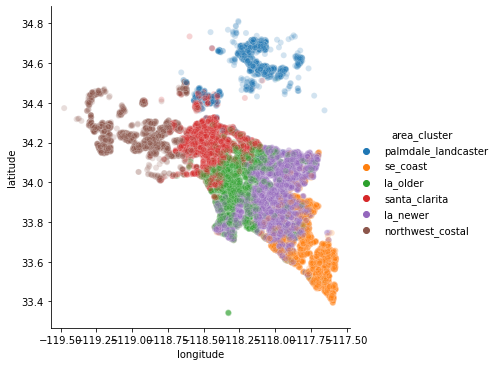

In [10]:
sns.relplot(data=X_train, x='longitude', y='latitude', hue='area_cluster', alpha =0.2);

# Cluster 2 : Size

features = 'scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio'

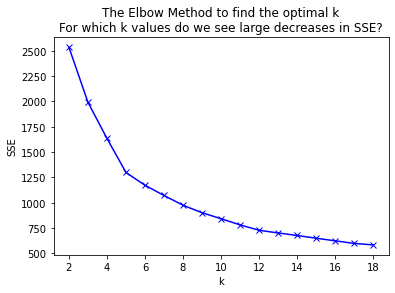

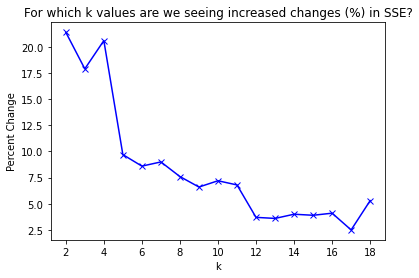

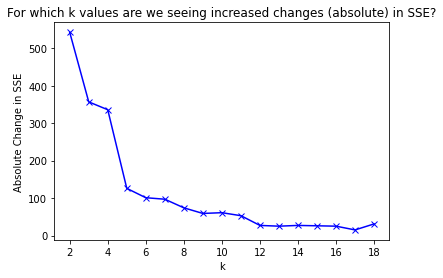

,k,sse,delta,pct_delta
0,2,2533.74932,543.00000,21.40000
1,3,1990.88155,357.00000,17.90000
2,4,1633.92581,336.00000,20.60000
3,5,1297.86064,126.00000,9.70000
4,6,1171.59709,101.00000,8.60000
5,7,1070.84751,97.00000,9.00000
6,8,974.24178,74.00000,7.60000
7,9,900.57060,59.00000,6.60000
8,10,841.45544,61.00000,7.20000
9,11,780.54166,53.00000,6.80000


In [11]:
# Using the Elbow method we decided to cluster on k =7

cluster_vars = ['scaled_bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']
cluster_name = 'size_cluster'
k_range = range(2,20)

explore. find_k(X_train, cluster_vars, k_range)

In [12]:
X_train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,tax_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_1250_to_1650,size_cluster_1300_to_2000,size_cluster_1500_to_1900,size_cluster_1500_to_2800,size_cluster_2300_to_4400,size_cluster_2900_to_4000,size_cluster_900_to_1200,price_cluster_144000_to_355000,price_cluster_34000_to_110000,price_cluster_420000_to_870000,price_cluster_45000_to_173000,price_cluster_69000_to_210000,tax_cluster_1000_to_3000,tax_cluster_16000_to_22000,tax_cluster_30000_to_40000,tax_cluster_5000_to_6000,tax_cluster_8500_to_12000,logerror
21580,21580,11204960,3.00000,4.00000,2000.00000,6037.00000,34.56170,-118.08275,6999.00000,40227.00000,3101.00000,97328.00000,1987.00000,104877.00000,131090.00000,26213.00000,2623.93000,Los_Angeles,30.00000,0.20000,2.00162,0.16067,0.20000,0.40000,52.43850,0.20000,3.74525,0.10000,0.75000,0,"(-0.05, 0.05]",0.01791,0.82963,0.73177,0.33333,0.20338,0.50000,0.00883,0.21324,0.00883,0.19643,0.17285,palmdale_landcaster,1500_to_2800,69000_to_210000,1000_to_3000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,-0.01503
32781,32781,14323862,6.00000,6.00000,7393.00000,6059.00000,33.60152,-117.84523,24000.00000,40009.00000,1286.00000,96975.00000,1995.00000,1556016.00000,2449943.00000,893927.00000,29921.84000,Orange,22.00000,0.20000,1.22133,0.55096,0.40000,0.90000,210.47153,0.60000,37.24696,0.30000,1.00000,0,"(0.05, 0.2]",0.01791,0.17714,0.85659,0.83333,0.12372,0.83333,0.03101,0.15441,0.03101,0.28571,0.74125,se_coast,2900_to_4000,420000_to_870000,16000_to_22000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.15846
33161,33161,12205584,2.00000,3.00000,1778.00000,6037.00000,33.96600,-118.29863,4948.00000,12447.00000,3101.00000,96025.00000,1936.00000,87000.00000,347000.00000,260000.00000,4248.21000,Los_Angeles,81.00000,0.60000,1.22427,0.11359,0.10000,0.40000,48.93138,0.10000,52.54648,0.40000,0.66667,1,"(-0.05, 0.05]",0.01791,0.42483,0.61833,0.16667,0.12402,0.33333,0.00615,0.58824,0.00615,0.16667,0.14945,la_older,1250_to_1650,144000_to_355000,5000_to_6000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.01774
45785,45785,12078527,3.00000,4.00000,2777.00000,6037.00000,34.16601,-118.21853,9989.00000,45457.00000,3101.00000,96327.00000,1990.00000,322342.00000,875355.00000,553013.00000,9603.39000,Los_Angeles,27.00000,0.20000,1.09709,0.22932,0.20000,0.60000,116.07562,0.40000,55.36220,0.40000,0.75000,0,"(0.05, 0.2]",0.01791,0.56074,0.66042,0.33333,0.11104,0.50000,0.01273,0.19118,0.01273,0.19643,0.25474,santa_clarita,1500_to_2800,420000_to_870000,8500_to_12000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.06685
45820,45820,14266520,3.00000,4.00000,1939.00000,6059.00000,33.70670,-117.89868,6028.00000,47568.00000,1286.00000,97004.00000,1971.00000,139321.00000,327623.00000,188302.00000,3923.98000,Orange,46.00000,0.33300,1.19771,0.13838,0.10000,0.40000,71.85199,0.20000,31.23789,0.30000,0.75000,0,"(-0.05, 0.05]",0.01791,0.24862,0.82851,0.33333,0.12131,0.50000,0.00756,0.33088,0.00756,0.19643,0.16642,se_coast,1500_to_2800,144000_to_355000,5000_to_6000,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.02213


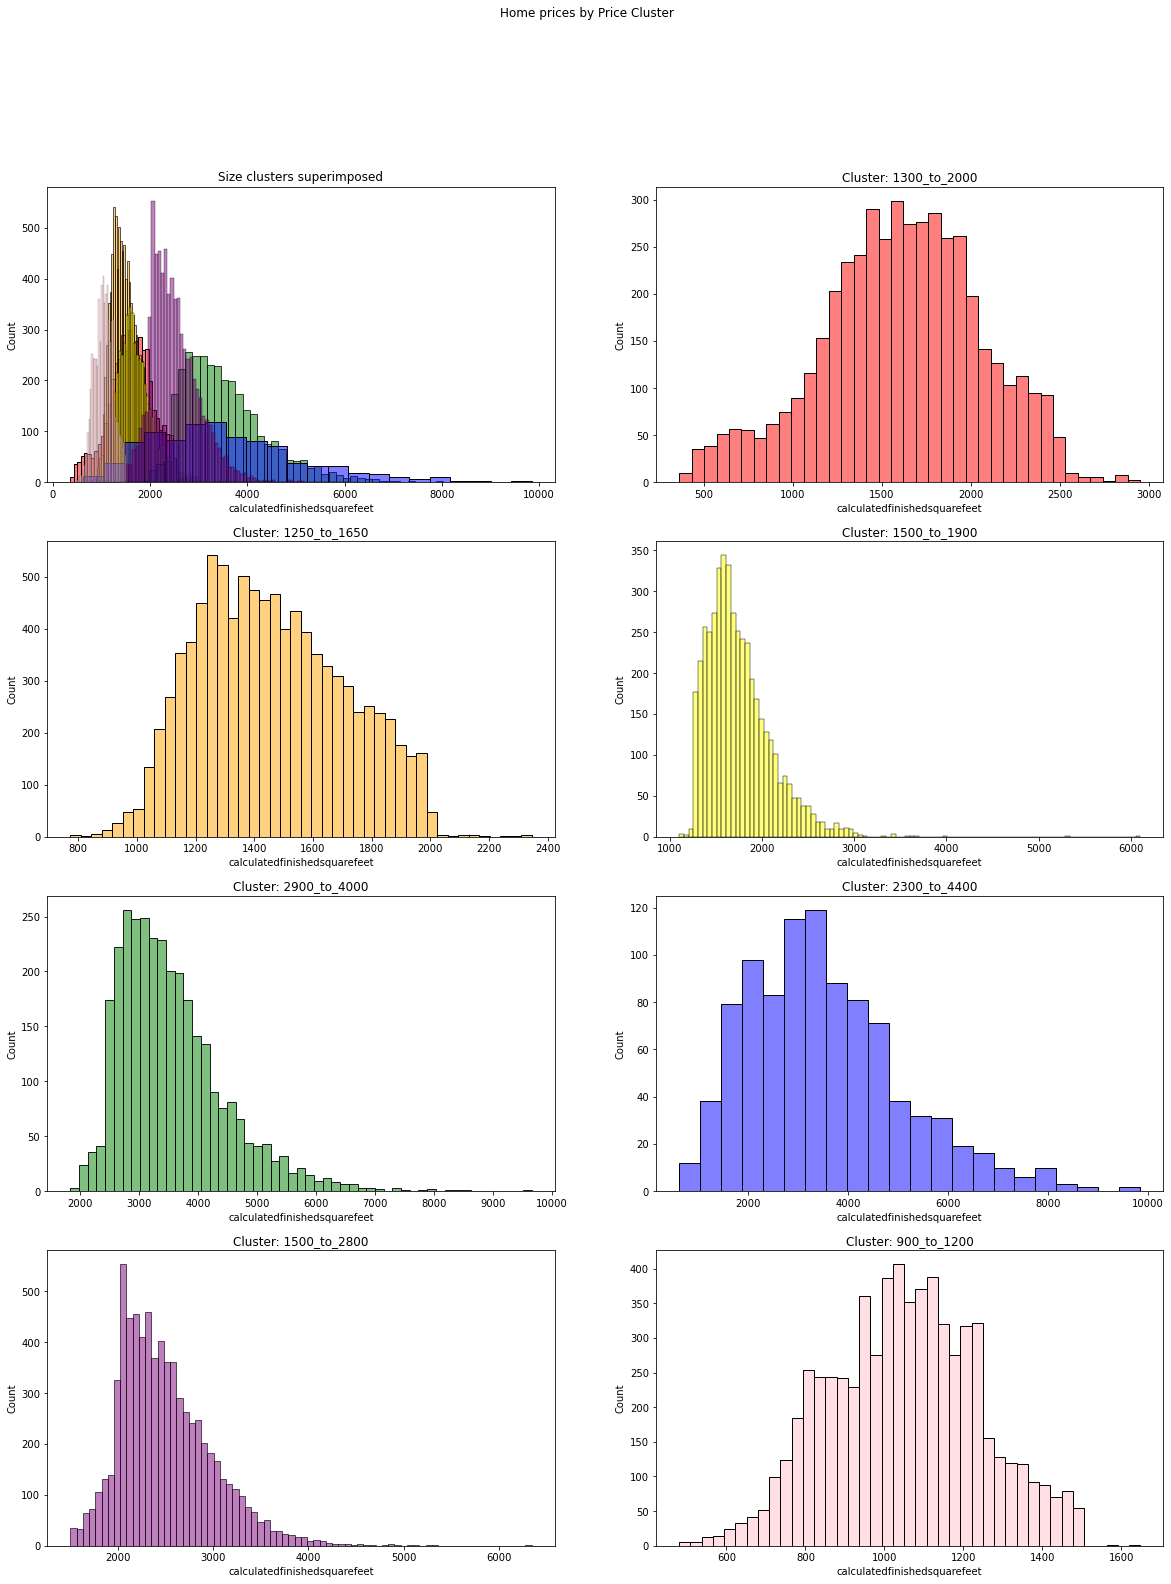

In [13]:
#Visual representation of size clustering by overlaying and looking at each cluster individually for meaning
explore.plot_size_clusters()

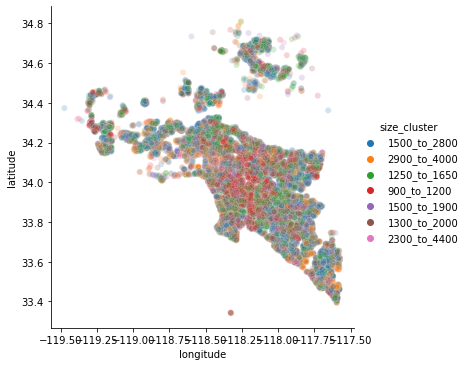

In [14]:
# Our clusters represented across the zillow dataset showing the distribution by lat/long

sns.relplot(data=X_train, x='longitude', y='latitude', hue='size_cluster', alpha =0.2);

# Cluster 3: Price
features = 'taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin'

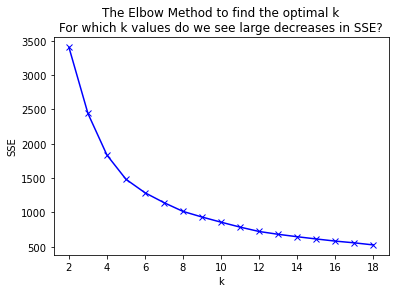

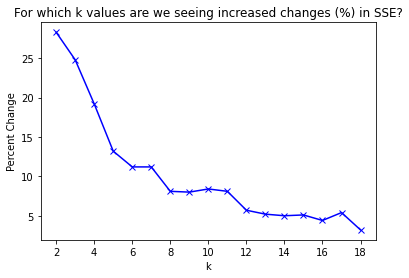

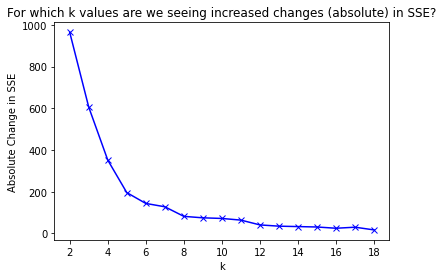

,k,sse,delta,pct_delta
0,2,3405.13436,965.00000,28.30000
1,3,2440.55213,606.00000,24.80000
2,4,1834.12547,352.00000,19.20000
3,5,1481.87433,196.00000,13.20000
4,6,1285.75965,144.00000,11.20000
5,7,1141.57474,128.00000,11.20000
6,8,1013.85098,82.00000,8.10000
7,9,932.12941,75.00000,8.00000
8,10,857.13998,72.00000,8.40000
9,11,785.42734,64.00000,8.10000


In [15]:
# Using the Elbow method we decided to cluster on k = 5
cluster_vars = ['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']
cluster_name = 'price_cluster'

explore.find_k(X_train, cluster_vars, k_range)

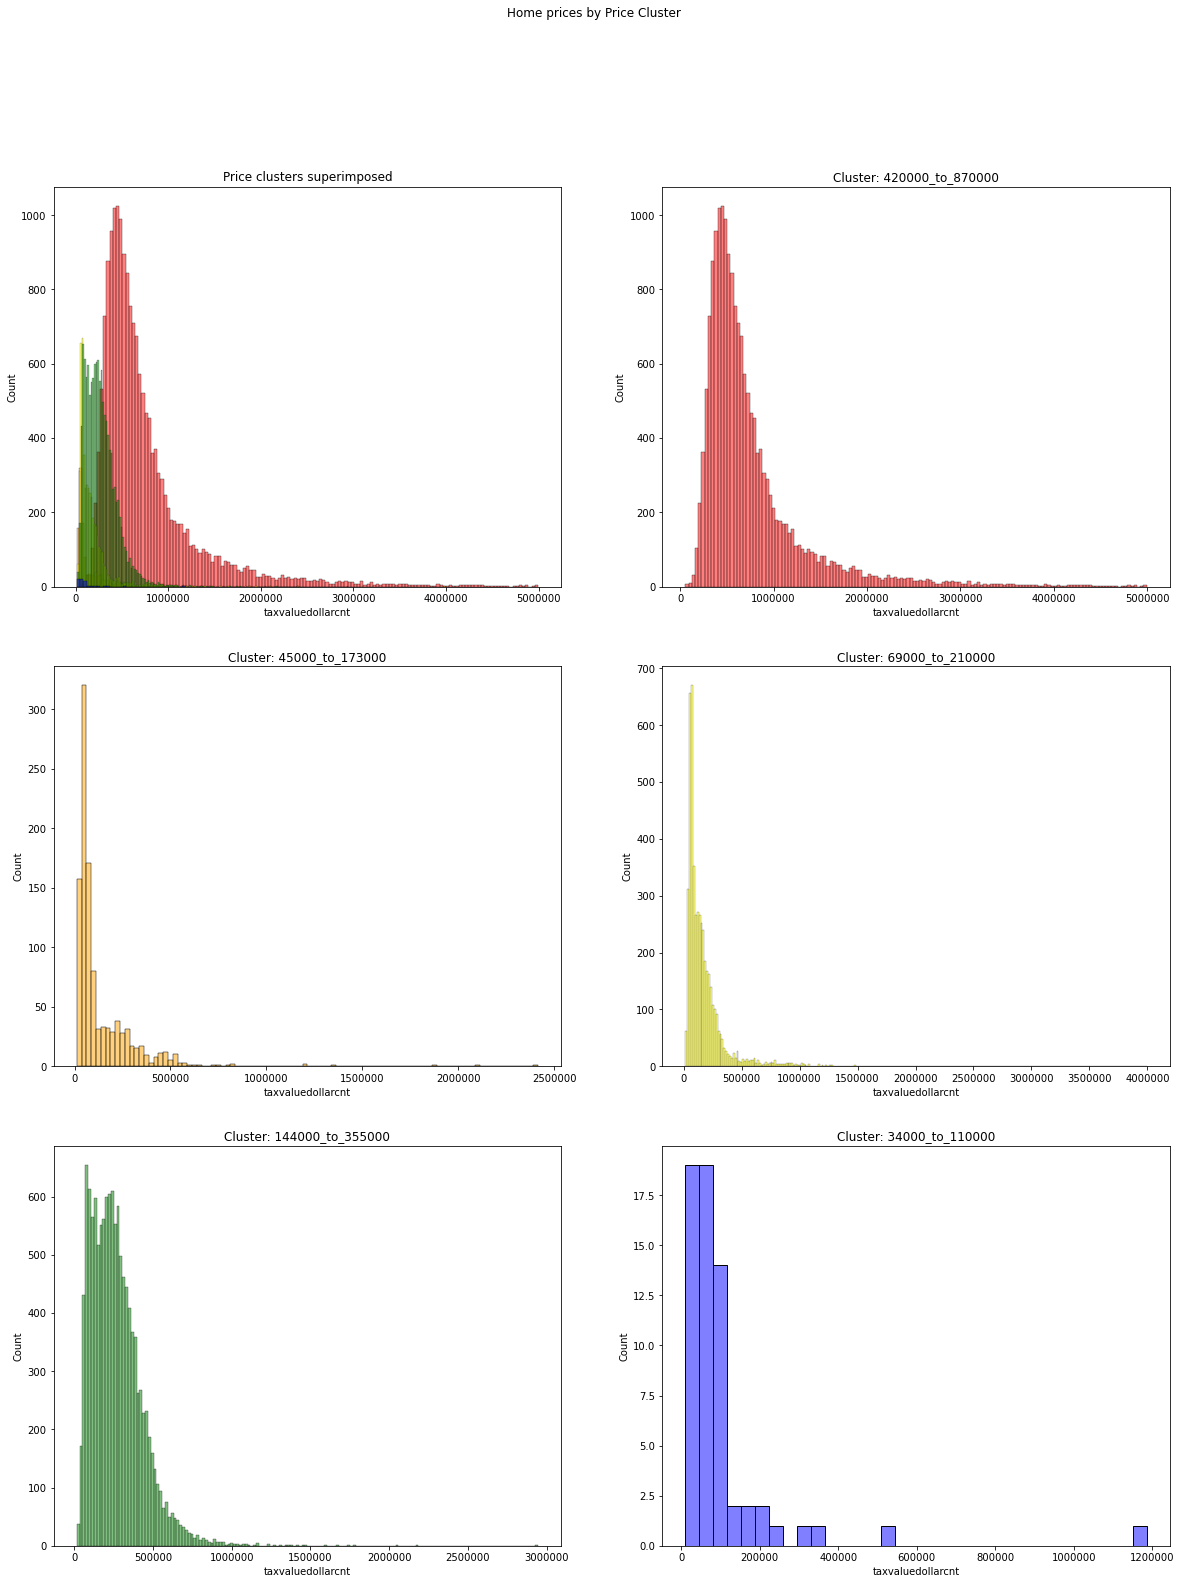

In [16]:
#Visual representation of price clustering by overlaying and looking at each cluster individually for meaning

explore.plot_prices_clusters()

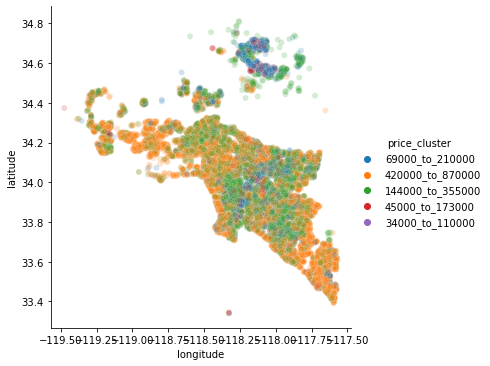

In [23]:
# Our clusters represented across the zillow dataset showing the distribution by lat/long

sns.relplot(data=X_train, x='longitude', y='latitude', hue='price_cluster', alpha =0.2);

# Cluster 4: Tax
features = 'taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'

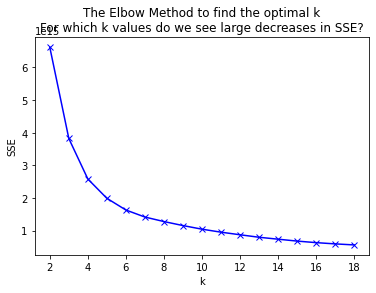

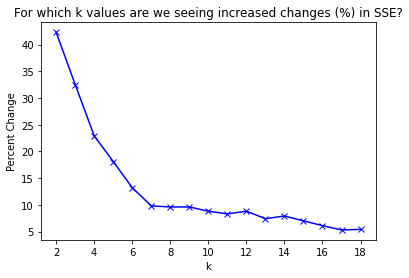

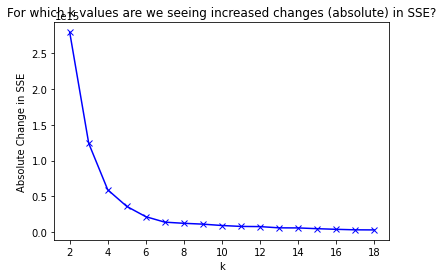

,k,sse,delta,pct_delta
0,2,6619195678852812.00000,2796837576628142.00000,42.30000
1,3,3822358102224670.00000,1241814721597765.00000,32.50000
2,4,2580543380626905.00000,591237460747176.00000,22.90000
3,5,1989305919879729.25000,359222366792620.00000,18.10000
4,6,1630083553087109.50000,215378914900026.00000,13.20000
5,7,1414704638187083.75000,138647500132534.00000,9.80000
6,8,1276057138054549.75000,122705212173722.00000,9.60000
7,9,1153351925880827.50000,110915683850843.00000,9.60000
8,10,1042436242029984.12500,91874777476191.00000,8.80000
9,11,950561464553793.00000,79105624005574.00000,8.30000


In [18]:
# Using the Elbow method we decided to cluster on k = 5

cluster_vars = ['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']
cluster_name = 'tax_cluster'
k_range = range(2,20)

explore.find_k(X_train, cluster_vars, k_range)

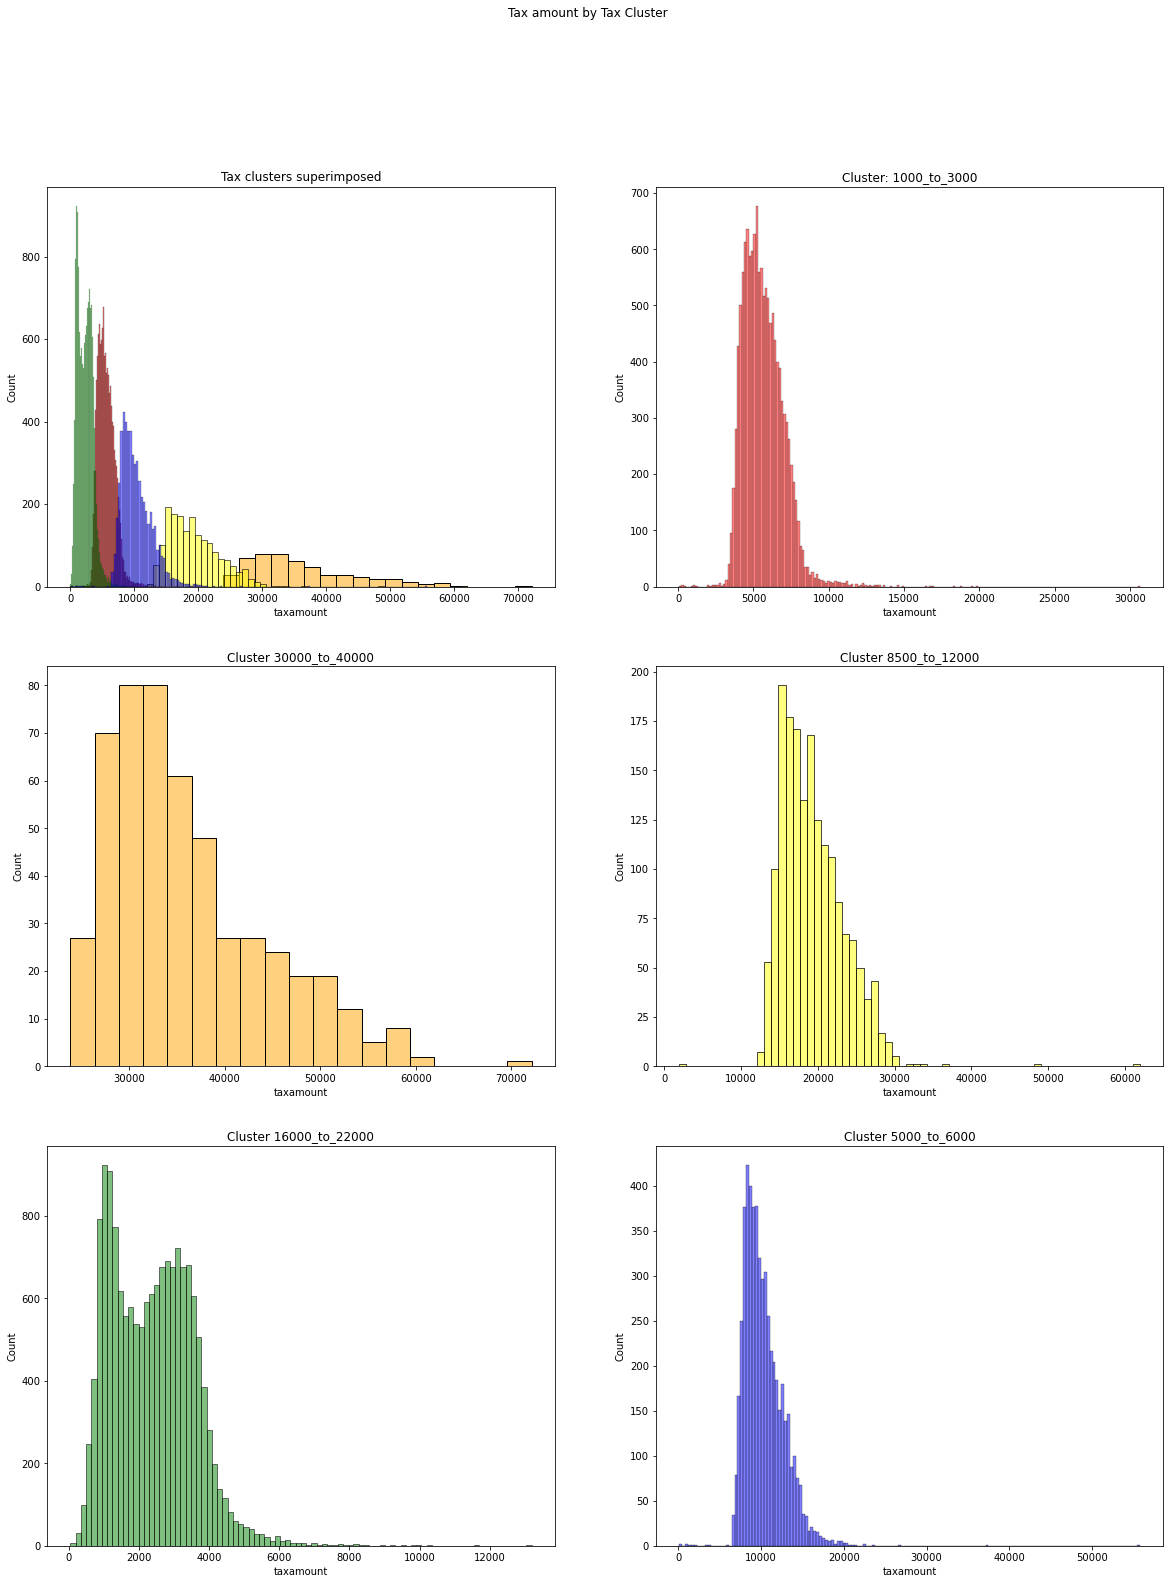

In [19]:
#Visual representation of price clustering by overlaying and looking at each cluster individually for meaning
explore.plot_tax_cluster()

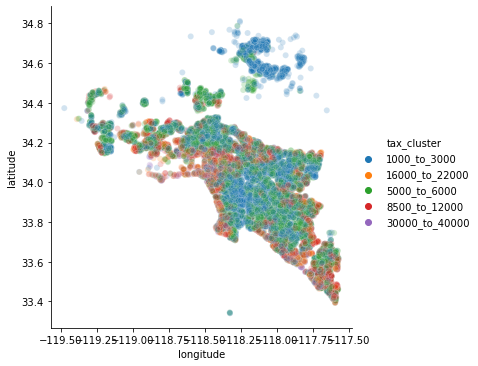

In [24]:
# Our clusters represented across the zillow dataset showing the distribution by lat/long
sns.relplot(data=X_train, x='longitude', y='latitude', hue='tax_cluster', alpha =0.2);

In [25]:
train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,tax_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_1250_to_1650,size_cluster_1300_to_2000,size_cluster_1500_to_1900,size_cluster_1500_to_2800,size_cluster_2300_to_4400,size_cluster_2900_to_4000,size_cluster_900_to_1200,price_cluster_144000_to_355000,price_cluster_34000_to_110000,price_cluster_420000_to_870000,price_cluster_45000_to_173000,price_cluster_69000_to_210000,tax_cluster_1000_to_3000,tax_cluster_16000_to_22000,tax_cluster_30000_to_40000,tax_cluster_5000_to_6000,tax_cluster_8500_to_12000,logerror
21580,21580,11204960,3.00000,4.00000,2000.00000,6037.00000,34.56170,-118.08275,6999.00000,40227.00000,3101.00000,97328.00000,1987.00000,104877.00000,131090.00000,26213.00000,2623.93000,Los_Angeles,30.00000,0.20000,2.00162,0.16067,0.20000,0.40000,52.43850,0.20000,3.74525,0.10000,0.75000,0,"(-0.05, 0.05]",0.01791,0.82963,0.73177,0.33333,0.20338,0.50000,0.00883,0.21324,0.00883,0.19643,0.17285,palmdale_landcaster,1500_to_2800,69000_to_210000,1000_to_3000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,-0.01503
32781,32781,14323862,6.00000,6.00000,7393.00000,6059.00000,33.60152,-117.84523,24000.00000,40009.00000,1286.00000,96975.00000,1995.00000,1556016.00000,2449943.00000,893927.00000,29921.84000,Orange,22.00000,0.20000,1.22133,0.55096,0.40000,0.90000,210.47153,0.60000,37.24696,0.30000,1.00000,0,"(0.05, 0.2]",0.01791,0.17714,0.85659,0.83333,0.12372,0.83333,0.03101,0.15441,0.03101,0.28571,0.74125,se_coast,2900_to_4000,420000_to_870000,16000_to_22000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.15846
33161,33161,12205584,2.00000,3.00000,1778.00000,6037.00000,33.96600,-118.29863,4948.00000,12447.00000,3101.00000,96025.00000,1936.00000,87000.00000,347000.00000,260000.00000,4248.21000,Los_Angeles,81.00000,0.60000,1.22427,0.11359,0.10000,0.40000,48.93138,0.10000,52.54648,0.40000,0.66667,1,"(-0.05, 0.05]",0.01791,0.42483,0.61833,0.16667,0.12402,0.33333,0.00615,0.58824,0.00615,0.16667,0.14945,la_older,1250_to_1650,144000_to_355000,5000_to_6000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.01774
45785,45785,12078527,3.00000,4.00000,2777.00000,6037.00000,34.16601,-118.21853,9989.00000,45457.00000,3101.00000,96327.00000,1990.00000,322342.00000,875355.00000,553013.00000,9603.39000,Los_Angeles,27.00000,0.20000,1.09709,0.22932,0.20000,0.60000,116.07562,0.40000,55.36220,0.40000,0.75000,0,"(0.05, 0.2]",0.01791,0.56074,0.66042,0.33333,0.11104,0.50000,0.01273,0.19118,0.01273,0.19643,0.25474,santa_clarita,1500_to_2800,420000_to_870000,8500_to_12000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.06685
45820,45820,14266520,3.00000,4.00000,1939.00000,6059.00000,33.70670,-117.89868,6028.00000,47568.00000,1286.00000,97004.00000,1971.00000,139321.00000,327623.00000,188302.00000,3923.98000,Orange,46.00000,0.33300,1.19771,0.13838,0.10000,0.40000,71.85199,0.20000,31.23789,0.30000,0.75000,0,"(-0.05, 0.05]",0.01791,0.24862,0.82851,0.33333,0.12131,0.50000,0.00756,0.33088,0.00756,0.19643,0.16642,se_coast,1500_to_2800,144000_to_355000,5000_to_6000,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.02213


# Clustering Takeaways:
    - Each of the four clustering presented strong relationships of features to further understand the data
    - No single feature was used in multiple clusters
    - Clusters were given labels through detailed analysis to understand their deeper meaning
    - Clusters were one hot encoded to use for future modeling

# Modeling

In [21]:
X_train

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,tax_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_1250_to_1650,size_cluster_1300_to_2000,size_cluster_1500_to_1900,size_cluster_1500_to_2800,size_cluster_2300_to_4400,size_cluster_2900_to_4000,size_cluster_900_to_1200,price_cluster_144000_to_355000,price_cluster_34000_to_110000,price_cluster_420000_to_870000,price_cluster_45000_to_173000,price_cluster_69000_to_210000,tax_cluster_1000_to_3000,tax_cluster_16000_to_22000,tax_cluster_30000_to_40000,tax_cluster_5000_to_6000,tax_cluster_8500_to_12000,logerror
21580,21580,11204960,3.00000,4.00000,2000.00000,6037.00000,34.56170,-118.08275,6999.00000,40227.00000,3101.00000,97328.00000,1987.00000,104877.00000,131090.00000,26213.00000,2623.93000,Los_Angeles,30.00000,0.20000,2.00162,0.16067,0.20000,0.40000,52.43850,0.20000,3.74525,0.10000,0.75000,0,"(-0.05, 0.05]",0.01791,0.82963,0.73177,0.33333,0.20338,0.50000,0.00883,0.21324,0.00883,0.19643,0.17285,palmdale_landcaster,1500_to_2800,69000_to_210000,1000_to_3000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,-0.01503
32781,32781,14323862,6.00000,6.00000,7393.00000,6059.00000,33.60152,-117.84523,24000.00000,40009.00000,1286.00000,96975.00000,1995.00000,1556016.00000,2449943.00000,893927.00000,29921.84000,Orange,22.00000,0.20000,1.22133,0.55096,0.40000,0.90000,210.47153,0.60000,37.24696,0.30000,1.00000,0,"(0.05, 0.2]",0.01791,0.17714,0.85659,0.83333,0.12372,0.83333,0.03101,0.15441,0.03101,0.28571,0.74125,se_coast,2900_to_4000,420000_to_870000,16000_to_22000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0.15846
33161,33161,12205584,2.00000,3.00000,1778.00000,6037.00000,33.96600,-118.29863,4948.00000,12447.00000,3101.00000,96025.00000,1936.00000,87000.00000,347000.00000,260000.00000,4248.21000,Los_Angeles,81.00000,0.60000,1.22427,0.11359,0.10000,0.40000,48.93138,0.10000,52.54648,0.40000,0.66667,1,"(-0.05, 0.05]",0.01791,0.42483,0.61833,0.16667,0.12402,0.33333,0.00615,0.58824,0.00615,0.16667,0.14945,la_older,1250_to_1650,144000_to_355000,5000_to_6000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.01774
45785,45785,12078527,3.00000,4.00000,2777.00000,6037.00000,34.16601,-118.21853,9989.00000,45457.00000,3101.00000,96327.00000,1990.00000,322342.00000,875355.00000,553013.00000,9603.39000,Los_Angeles,27.00000,0.20000,1.09709,0.22932,0.20000,0.60000,116.07562,0.40000,55.36220,0.40000,0.75000,0,"(0.05, 0.2]",0.01791,0.56074,0.66042,0.33333,0.11104,0.50000,0.01273,0.19118,0.01273,0.19643,0.25474,santa_clarita,1500_to_2800,420000_to_870000,8500_to_12000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.06685
45820,45820,14266520,3.00000,4.00000,1939.00000,6059.00000,33.70670,-117.89868,6028.00000,47568.00000,1286.00000,97004.00000,1971.00000,139321.00000,327623.00000,188302.00000,3923.98000,Orange,46.00000,0.33300,1.19771,0.13838,0.10000,0.40000,71.85199,0.20000,31.23789,0.30000,0.75000,0,"(-0.05, 0.05]",0.01791,0.24862,0.82851,0.33333,0.12131,0.50000,0.00756,0.33088,0.00756,0.19643,0.16642,se_coast,1500_to_2800,144000_to_355000,5000_to_6000,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,-0.02213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Takeaways/keypoints

# Explore rubric:
- At least 4 of the questions asked and answered of the data are shared in the final report notebook. You should call out questions of the data using natural language that speaks to the business stakeholders in markdown cells, ideally a header prior to the visualization or statistical test, that you then explore. This does not take the place of stating your null hypothesis/alternative hypothesis when doing a statistical test. But those hypotheses are generally for you. By writing questions that you intend to answer with visualizations and statistical tests in natural language, like "Are office supplies leading to differences in profit in Texas?", you are able to guide both yourself and your reader through the highlights of your analysis. You ask a question, create a visual, run a statistical test (if appropriate), and wrap it nicely with a markdown cell that contains a clear answer in layman's terms. You do all that before moving to the next question. / 6


- At least 5 visualizations are included in your final report. The ones included answer a question (remember, NO is an answer) and the one(s) to provide necessary context (such as the distribution of the target variable). All statistical tests included in the final report should be supported with an visualization of the interaction of the variables being tested. Charts in the final report should have titles and labels that are descriptive and useful for the end user/audience/consumer of the report. All visualizations in the final report are mentioned or discussed if a verbal presentation is given. / 6


- At least 2 statistical tests are included in your final report. The correct tests are run, given the data type and distribution, and the correct conclusions are drawn. - correlation: 2 continuous variables, normally distributed, testing for LINEAR correlation only (H_0: Not linearly dependent) - independent t-test: 1 continuous, somewhat normally distributed variable, one boolean variable, equal variance, independent (H_0: population mean of each group is equal) - chi-square test: 2 discrete variables. (H_0: the 2 variables are independent of each other). (other tests may be used) /6


- Following your exploration section, you summarize your analysis (in a markdown cell using natural language): what you found and how you will use it moving forward. This includes key takeaways from all the questions answered in explore, a list of which features will be used in modeling and why, and which features will not move forward and why. You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together. / 6



